In [344]:
import numpy as np
import pandas as pd
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import time, datetime
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import model_selection,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF 
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [295]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [98]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [99]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:ylabel='Frequency'>

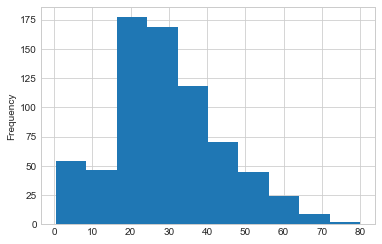

In [100]:
train.Age.plot.hist()

In [101]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

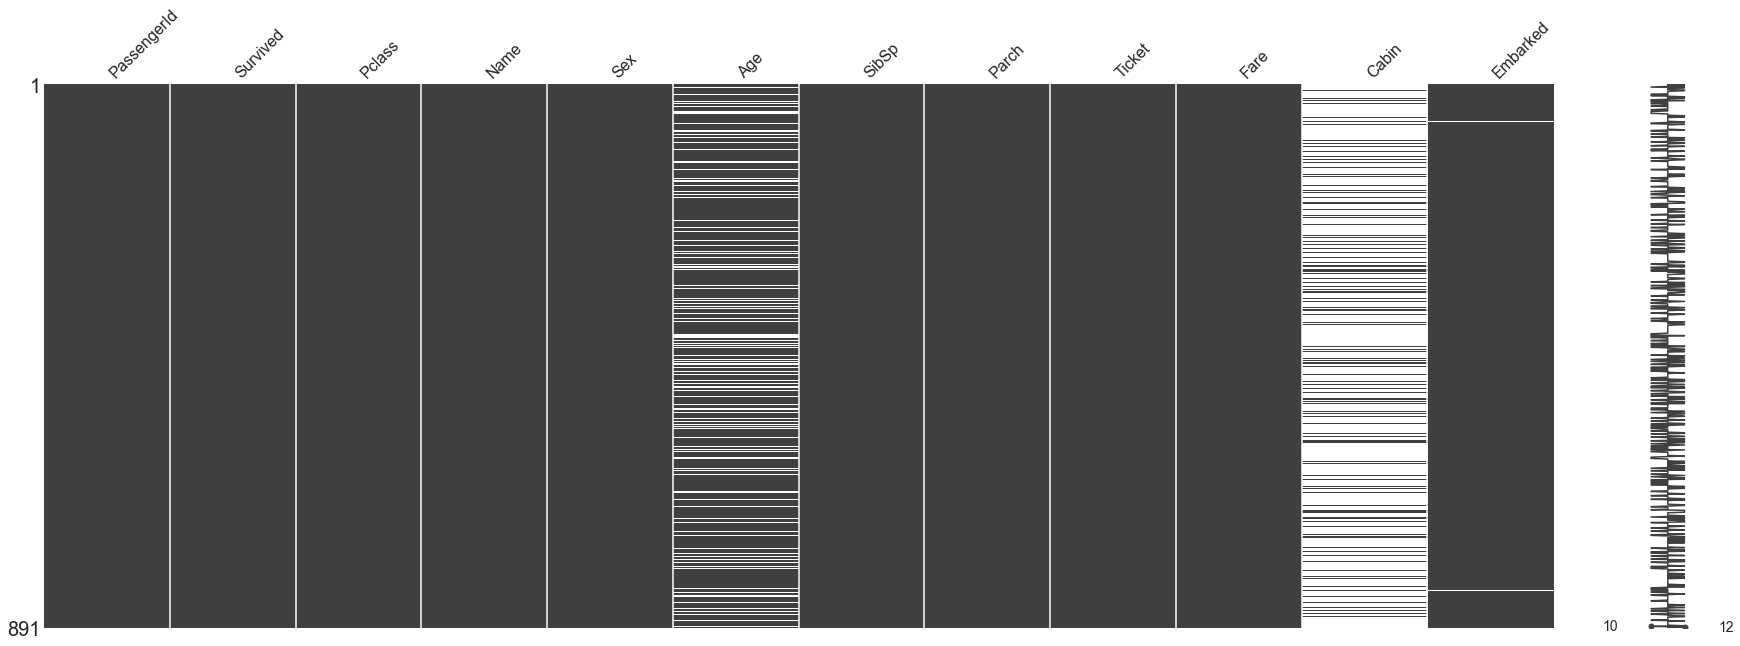

In [102]:
missingno.matrix(train,figsize=(30,10))

In [103]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='count', ylabel='Survived'>

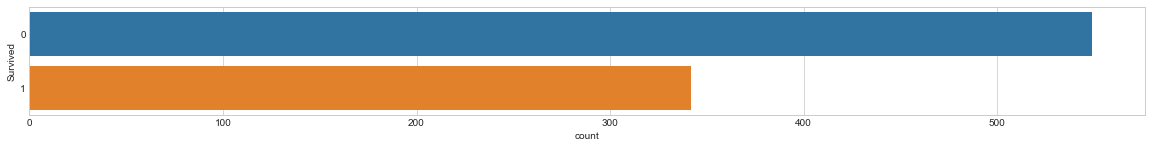

In [104]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y="Survived",data=train)

In [105]:
print(train.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [106]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

In [107]:
df_bin["Survived"] = train.Survived
df_con["Survived"] = train.Survived

In [108]:
df_bin.head(10)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


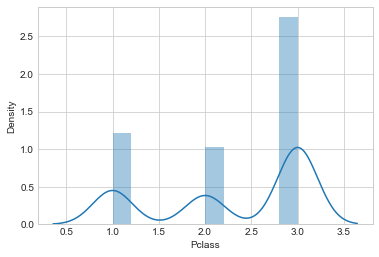

In [109]:
ax = sns.distplot(train["Pclass"])

In [110]:
df_bin["Pclass"] = train.Pclass
df_con["Pclass"] = train.Pclass

0


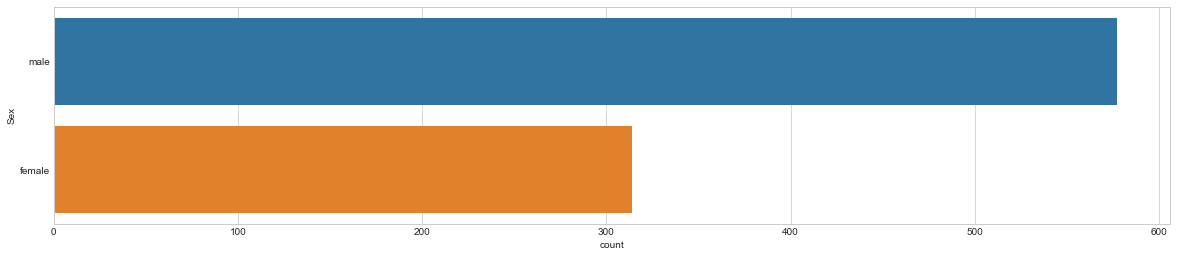

In [111]:
fig = plt.figure(figsize=(20,4))
ax = sns.countplot(y="Sex",data=train)
print(train.Sex.isnull().sum())

In [112]:
df_bin["Sex"] = train.Sex
df_bin.Sex = np.where(df_bin.Sex == "female",1,0) #1 female, 0 male
df_bin.head(10)

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0
5,0,3,0
6,0,1,0
7,0,3,0
8,1,3,1
9,1,2,1


In [113]:
df_con["Sex"]  = train.Sex

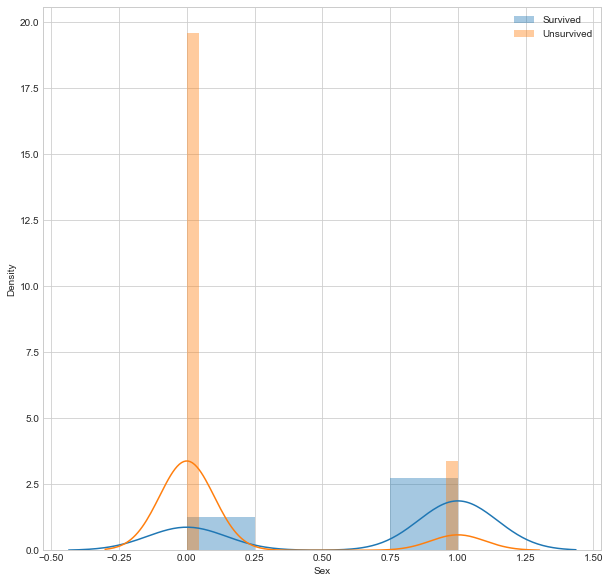

In [114]:
fig = plt.figure(figsize=(10,10))
ax = sns.distplot(df_bin[df_bin["Survived"]==1]["Sex"],label="Survived")
ax = sns.distplot(df_bin[df_bin["Survived"]==0]["Sex"],label="Unsurvived")
ax.legend()
plt.show()

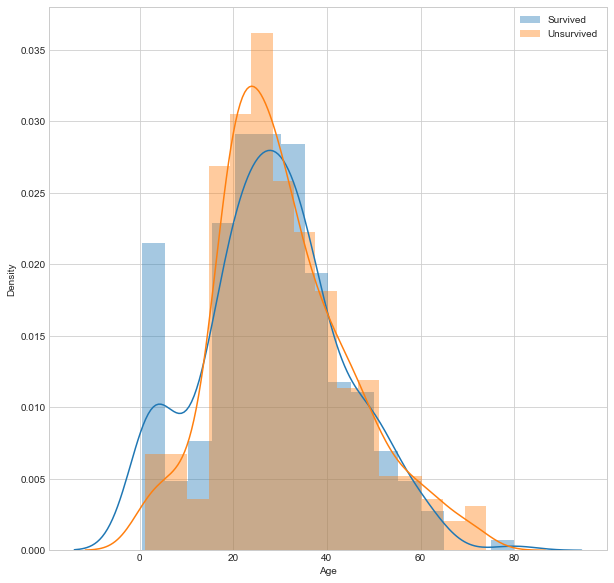

In [115]:
df_bin["Age"] = train.Age
fig = plt.figure(figsize=(10,10))
ax = sns.distplot(df_bin[df_bin.Survived==1]["Age"],label="Survived")
ax = sns.distplot(df_bin[df_bin.Survived==0]["Age"],label="Unsurvived")
plt.legend()
del df_bin["Age"]

In [116]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

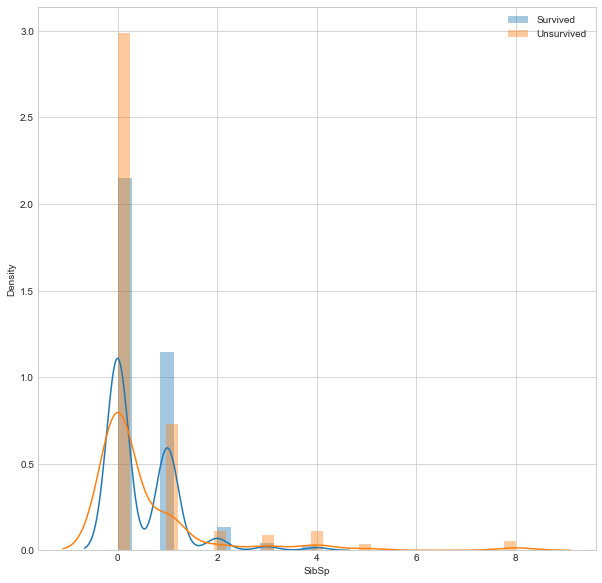

In [117]:
df_bin["SibSp"] = train.SibSp
df_con["SibSp"] = train.SibSp

fig = plt.figure(figsize=(10,10))
ax = sns.distplot(df_bin[df_bin.Survived==1].SibSp,label="Survived")
ax = sns.distplot(df_bin[df_bin.Survived==0].SibSp,label="Unsurvived")
plt.legend()
plt.show()

In [118]:
train.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

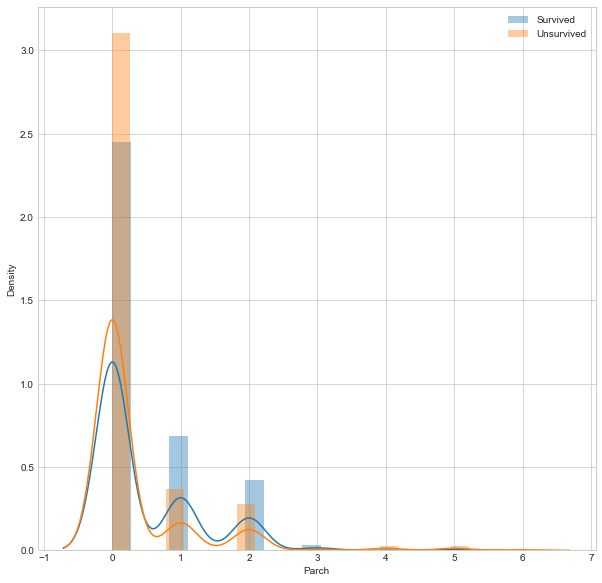

In [119]:
df_bin["Parch"] = train.Parch
df_con["Parch"] = train.Parch

fig = plt.figure(figsize=(10,10))
ax = sns.distplot(df_bin[df_bin.Survived==1].Parch,label="Survived")
ax = sns.distplot(df_bin[df_bin.Survived==0].Parch,label="Unsurvived")
plt.legend()
plt.show()

In [120]:
df_bin.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch'], dtype='object')

In [121]:
df_con.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch'], dtype='object')

In [122]:
df_con = df_con.reindex_like(df_bin)
df_con

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0
...,...,...,...,...,...
886,0,2,male,0,0
887,1,1,female,0,0
888,0,3,female,1,2
889,1,1,male,0,0


In [123]:
df_con["Fare"] = train.Fare
df_bin["Fare"] = pd.cut(train['Fare'], bins=5)
df_con.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500
5,0,3,male,0,0,8.4583
6,0,1,male,0,0,51.8625
7,0,3,male,3,1,21.0750
8,1,3,female,0,2,11.1333
9,1,2,female,1,0,30.0708


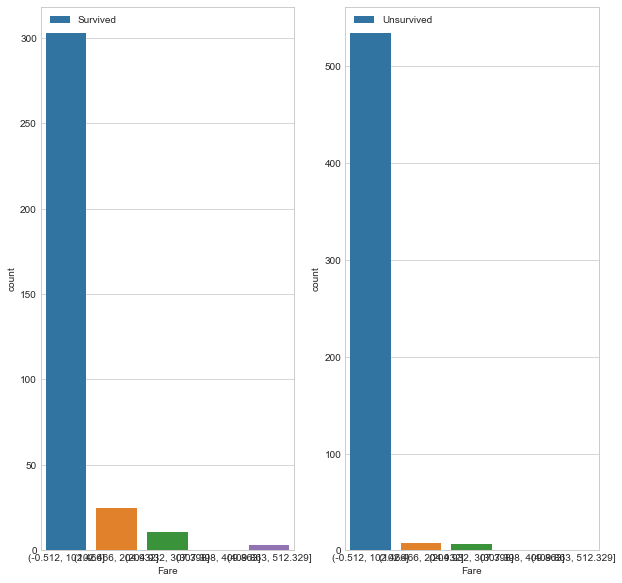

In [124]:
fig= plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
ax = sns.countplot(df_bin[df_bin.Survived==1]['Fare'],label="Survived")
plt.legend()
plt.subplot(1,2,2)
ax = sns.countplot(df_bin[df_bin.Survived==0]['Fare'],label="Unsurvived")
plt.legend()
plt.show()

In [125]:
df_con["Embarked"] = train.Embarked
df_bin["Embarked"] = train.Embarked

In [126]:
df_con.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
5,0,3,male,0,0,8.4583,Q
6,0,1,male,0,0,51.8625,S
7,0,3,male,3,1,21.0750,S
8,1,3,female,0,2,11.1333,S
9,1,2,female,1,0,30.0708,C


In [127]:
df_bin.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S
5,0,3,0,0,0,"(-0.512, 102.466]",Q
6,0,1,0,0,0,"(-0.512, 102.466]",S
7,0,3,0,3,1,"(-0.512, 102.466]",S
8,1,3,1,0,2,"(-0.512, 102.466]",S
9,1,2,1,1,0,"(-0.512, 102.466]",C


In [128]:
df_con = df_con.dropna(subset=["Embarked"])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_bin))

889


In [129]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.pop(0)
df_bin_enc = pd.get_dummies(df_bin,columns=one_hot_cols)
df_bin_enc.head(10)

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,0,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
8,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [276]:
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

df_Parch_one_hot = pd.get_dummies(df_con['Parch'], 
                                   prefix='parch')

df_sibsp_one_hot = pd.get_dummies(df_con['SibSp'], 
                                   prefix='sibsp')

In [131]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)
# Let's look at df_con_enc
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


In [279]:
df_con_enc_test = pd.concat([df_con, 
                             df_sibsp_one_hot,
                             df_Parch_one_hot,
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc_test = df_con_enc_test.drop(['Pclass', 'Sex', 'Embarked',"Parch",'SibSp'], axis=1)
# Let's look at df_con_enc
df_con_enc_test.head(20)

,Survived,Fare,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,parch_0,...,parch_5,parch_6,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,7.2500,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
1,1,71.2833,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,1,7.9250,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
3,1,53.1000,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0
4,0,8.0500,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
5,0,8.4583,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
6,0,51.8625,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
7,0,21.0750,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
8,1,11.1333,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
9,1,30.0708,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [132]:
select_df = df_con_enc
select_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [133]:
X_train = select_df.drop("Survived",axis=1)
y_train = select_df.Survived

In [280]:
select_df_test = df_con_enc_test
X_train_test = select_df_test.drop("Survived",axis=1)
y_train_test = select_df_test.Survived

In [261]:
def ml(algo,X_train,y_train,cv):
    model = algo.fit(X_train,y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, acc, acc_cv,model

## Logistic Regression

In [263]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log,model = ml(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:00.933566


## KNN

In [136]:
start_time = time.time()
k = 10
train_pre_knn, acc_knn, acc_cv_knn,model = ml(KNeighborsClassifier(n_neighbors=9),X_train,y_train,k)
knn_time = (time.time()-start_time)
print(f"Accuracy: {acc_knn}")
print(f"Accuracy CV {k}-Fold:{acc_cv_knn}")
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 81.66
Accuracy CV 10-Fold:77.39
Running Time: 0:00:00.141623


## Gaussian Naive Bayes

In [137]:
start_time = time.time()
k = 10
train_pre_GNB, acc_GNB, acc_cv_GNB,model = ml(GaussianNB(),X_train,y_train,k)
knn_time = (time.time()-start_time)
print(f"Accuracy: {acc_GNB}")
print(f"Accuracy CV {k}-Fold:{acc_cv_GNB}")
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 78.52
Accuracy CV 10-Fold:77.95
Running Time: 0:00:00.141623


## GradientBoostingClassifier

In [282]:
start_time = time.time()
k = 10
train_pre_gbc, acc_gbc, acc_cv_gbc,modelgbc = ml(GradientBoostingClassifier(n_estimators=100,learning_rate=0.08,random_state=0),X_train_test,y_train_test,k)
knn_time = (time.time()-start_time)
print(f"Accuracy: {acc_gbc}")
print(f"Accuracy CV {k}-Fold:{acc_cv_gbc}")
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 85.26
Accuracy CV 10-Fold:81.21
Running Time: 0:00:00.933566


## DecisionTreeClassifier

In [275]:
start_time = time.time()
k = 10
train_pre_dtc, acc_dtc, acc_cv_dtc,model = ml(DecisionTreeClassifier(),X_train_test,y_train_test,k)
knn_time = (time.time()-start_time)
print(f"Accuracy: {acc_dtc}")
print(f"Accuracy CV {k}-Fold:{acc_cv_dtc}")
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 92.46
Accuracy CV 10-Fold:80.09
Running Time: 0:00:00.933566


## SVM

In [140]:
start_time = time.time()
k = 10
train_pre_svc, acc_svc, acc_cv_svc,model = ml(SVC(gamma='auto'),X_train,y_train,k)
knn_time = (time.time()-start_time)
print(f"Accuracy: {acc_svc}")
print(f"Accuracy CV {k}-Fold:{acc_cv_svc}")
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 82.34
Accuracy CV 10-Fold:76.94
Running Time: 0:00:00.141623


## GaussianProcessClassifier

In [95]:
start_time = time.time()
k = 10
train_pre_gpc, acc_gpc, acc_cv_gpc,model = ml(GaussianProcessClassifier(),X_train,y_train,k)
knn_time = (time.time()-start_time)
print(f"Accuracy: {acc_gpc}")
print(f"Accuracy CV {k}-Fold:{acc_cv_gpc}")
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 88.64
Accuracy CV 10-Fold:78.74
Running Time: 0:00:02.246607


## AdaBoostClassifier

In [217]:
start_time = time.time()
k = 10
train_pre_ada, acc_ada, acc_cv_ada,model = ml(AdaBoostClassifier(learning_rate=0.5,random_state=0),X_train,y_train,k)
knn_time = (time.time()-start_time)
print(f"Accuracy: {acc_ada}")
print(f"Accuracy CV {k}-Fold:{acc_cv_ada}")
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 80.65
Accuracy CV 10-Fold:79.53
Running Time: 0:00:00.141623


## RandomForestClassifier

In [224]:
start_time = time.time()
k = 10
train_pre_rfc, acc_rfc, acc_cv_rfc,model = ml(RandomForestClassifier(n_estimators=1000,random_state=1,criterion="entropy"),X_train,y_train,k)
knn_time = (time.time()-start_time)
print(f"Accuracy: {acc_rfc}")
print(f"Accuracy CV {k}-Fold:{acc_cv_rfc}")
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 92.46
Accuracy CV 10-Fold:79.87
Running Time: 0:00:00.141623


## MLPClassifier

In [246]:
start_time = time.time()
k = 10
train_pre_mlp, acc_mlp, acc_cv_mlp,model = ml(MLPClassifier(solver='adam',alpha=1e-4,hidden_layer_sizes=(50,), random_state=1),X_train,y_train,k)
knn_time = (time.time()-start_time)
print(f"Accuracy: {acc_mlp}")
print(f"Accuracy CV {k}-Fold:{acc_cv_mlp}")
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 80.2
Accuracy CV 10-Fold:79.87
Running Time: 0:00:00.141623


In [349]:
start_time = time.time()
k = 10
param_dist = {'objective':'binary:logistic', 'n_estimators':200}
train_pre_xgb, acc_xgb, acc_cv_xgb,modelxgb = ml(XGBClassifier(**param_dist),X_train,y_train,k)
knn_time = (time.time()-start_time)
print(f"Accuracy: {acc_xgb}")
print(f"Accuracy CV {k}-Fold:{acc_cv_xgb}")
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

[16:02:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 92.35
Accuracy CV 10-Fold:80.09
Running Time: 0:00:00.933566


In [283]:
final = pd.DataFrame({"Model": ["Logistic Regression","KNN","Gaussian Naive Bayes","GradientBoostingClassifier","DecisionTreeClassifier","SVM","GaussianProcessClassifier","AdaBoostClassifier","RandomForestClassifier","MLPClassifier"],
                    "Score": [
                        acc_cv_log,
                        acc_cv_knn,
                        acc_cv_GNB,
                        acc_cv_gbc,
                        acc_cv_dtc,
                        acc_cv_svc,
                        acc_cv_gpc,
                        acc_cv_ada,
                        acc_cv_rfc,
                        acc_cv_mlp
                    ]})
final.sort_values("Score",ascending=False)

,Model,Score
3,GradientBoostingClassifier,81.21
4,DecisionTreeClassifier,80.09
8,RandomForestClassifier,79.87
9,MLPClassifier,79.87
7,AdaBoostClassifier,79.53
0,Logistic Regression,79.42
6,GaussianProcessClassifier,78.74
2,Gaussian Naive Bayes,77.95
1,KNN,77.39
5,SVM,76.94


In [285]:
fea_imp = pd.DataFrame({"imp": modelgbc.feature_importances_, "cols":X_train_test.columns})
fea_imp.sort_values("imp",ascending=False)

,imp,cols
19,0.301309,sex_male
18,0.244838,sex_female
0,0.206149,Fare
22,0.138054,pclass_3
20,0.032750,pclass_1
17,0.017892,embarked_S
8,0.013926,parch_0
9,0.012228,parch_1
16,0.004955,embarked_Q
15,0.004856,embarked_C


In [287]:
X_train_test.head()

,Fare,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,parch_0,parch_1,...,parch_5,parch_6,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,7.2500,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
1,71.2833,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,7.9250,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,53.1000,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
4,8.0500,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1


In [288]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [290]:
df_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

df_Parch_one_hot = pd.get_dummies(test['Parch'], 
                                   prefix='parch')

df_sibsp_one_hot = pd.get_dummies(test['SibSp'], 
                                   prefix='sibsp')

In [332]:
test_enc = pd.concat([test, 
                             df_sibsp_one_hot,
                             df_Parch_one_hot,
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)
test_enc["Fare"] = test_enc["Fare"].fillna(test_enc["Fare"].mean())

In [311]:
wanted_test_columns = X_train_test.columns
wanted_test_columns 

Index(['Fare', 'sibsp_0', 'sibsp_1', 'sibsp_2', 'sibsp_3', 'sibsp_4',
       'sibsp_5', 'sibsp_8', 'parch_0', 'parch_1', 'parch_2', 'parch_3',
       'parch_4', 'parch_5', 'parch_6', 'embarked_C', 'embarked_Q',
       'embarked_S', 'sex_female', 'sex_male', 'pclass_1', 'pclass_2',
       'pclass_3'],
      dtype='object')

In [333]:
#test_enc = test_enc.dropna(subset=["Fare"])
test_enc.Fare.isnull().sum()

0

In [334]:
predictions = modelgbc.predict(test_enc[wanted_test_columns])
#test_enc[wanted_test_columns]

In [335]:
predictions[:20]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [336]:
submission = pd.DataFrame()
submission["PassengerId"] = test_enc['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [337]:
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [339]:
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [340]:
submission.to_csv('../modelgbc_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!
